Decision tree Classification

(576, 8) (192, 8)
Accuracy:  79.17%
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       130
           1       0.72      0.58      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192

Confusion Matrix: 
 [[116  14]
 [ 26  36]]
[1.         0.07407407 0.07407407 1.         0.        ]
AUC:  0.7918114143920596


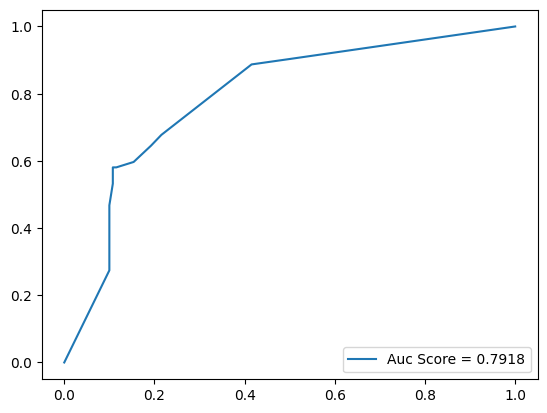

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

data = pd.read_csv('diabetes.csv')
data

X = data.drop('Outcome', axis="columns")

y = data["Outcome"] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy:  {round(acc*100,2)}%")


report = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n", report)

matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", matrix)


y_pred_proba = model.predict_proba(X_test)[::, 1]
print(y_pred_proba[:5])
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)
plt.plot(fpr,tpr, label = f"Auc Score = {str(round(auc, 4))}")
plt.legend(loc=4)
plt.show() 

Visualitions

In [38]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=None, class_names=['0', '1'])

NameError: name 'model' is not defined